In [1]:
import graphviz.backend as be

In [2]:
from sklearn.datasets import *
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

In [3]:
clas = tree.DecisionTreeClassifier(max_depth=2)  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

[Text(133.92000000000002, 181.2, 'X[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(200.88000000000002, 108.72, 'X[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

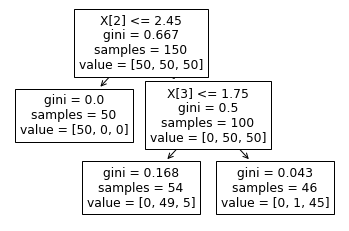

In [4]:
from sklearn.tree import plot_tree
plot_tree(clas)

## 1. Classification


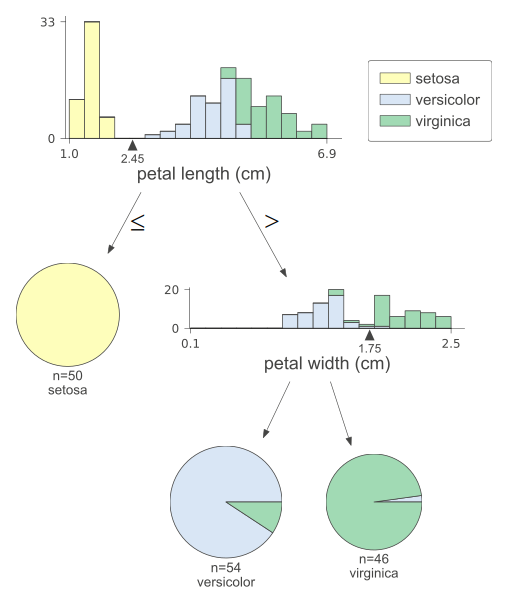

In [5]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"],
              scale=2.0)
viz

## 2.Regression

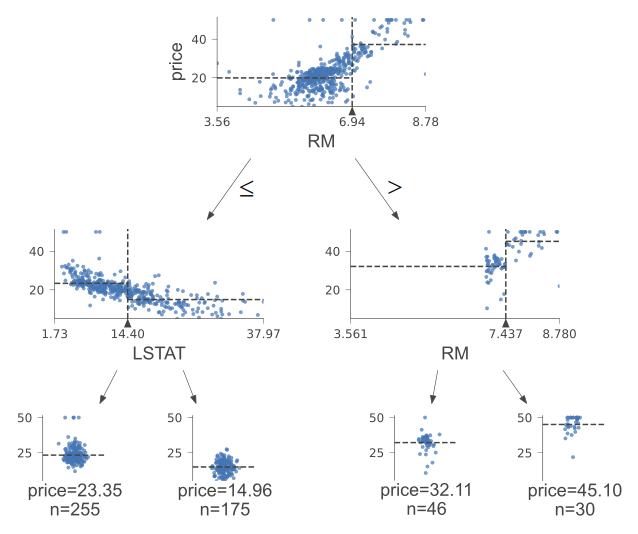

In [7]:
regr = tree.DecisionTreeRegressor(max_depth=2)
boston = load_boston()

X_train = boston.data
y_train = boston.target
regr.fit(X_train, y_train)

viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='price',
               feature_names=boston.feature_names,
               scale=2
              )
viz

## 3. Horizontal Decision Tree


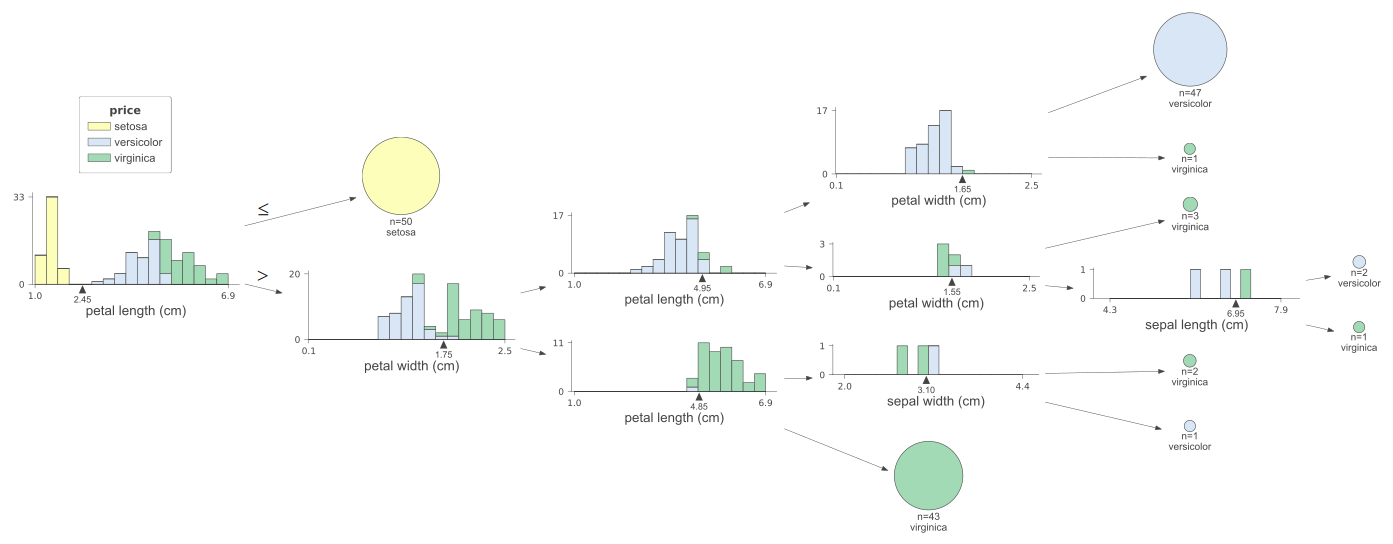

In [9]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               scale = 1.5,
               orientation='LR')
viz

## 4. Show prediction path


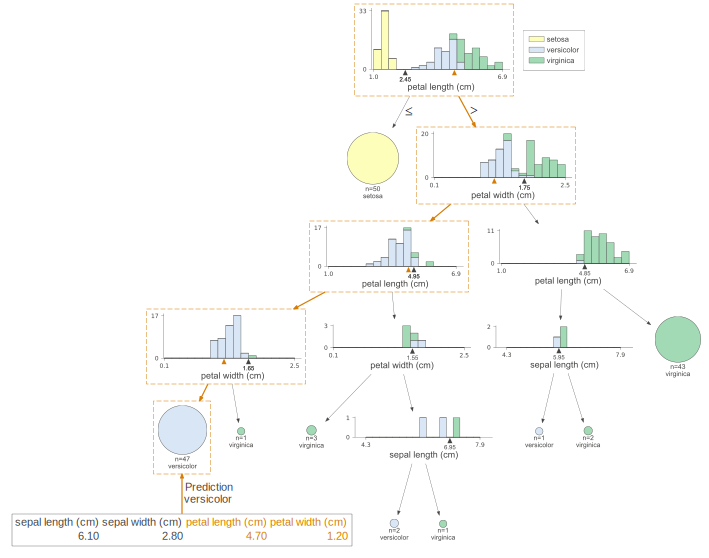

In [10]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X)
viz

In [11]:
X

array([6.1, 2.8, 4.7, 1.2])

## 5. Show node number


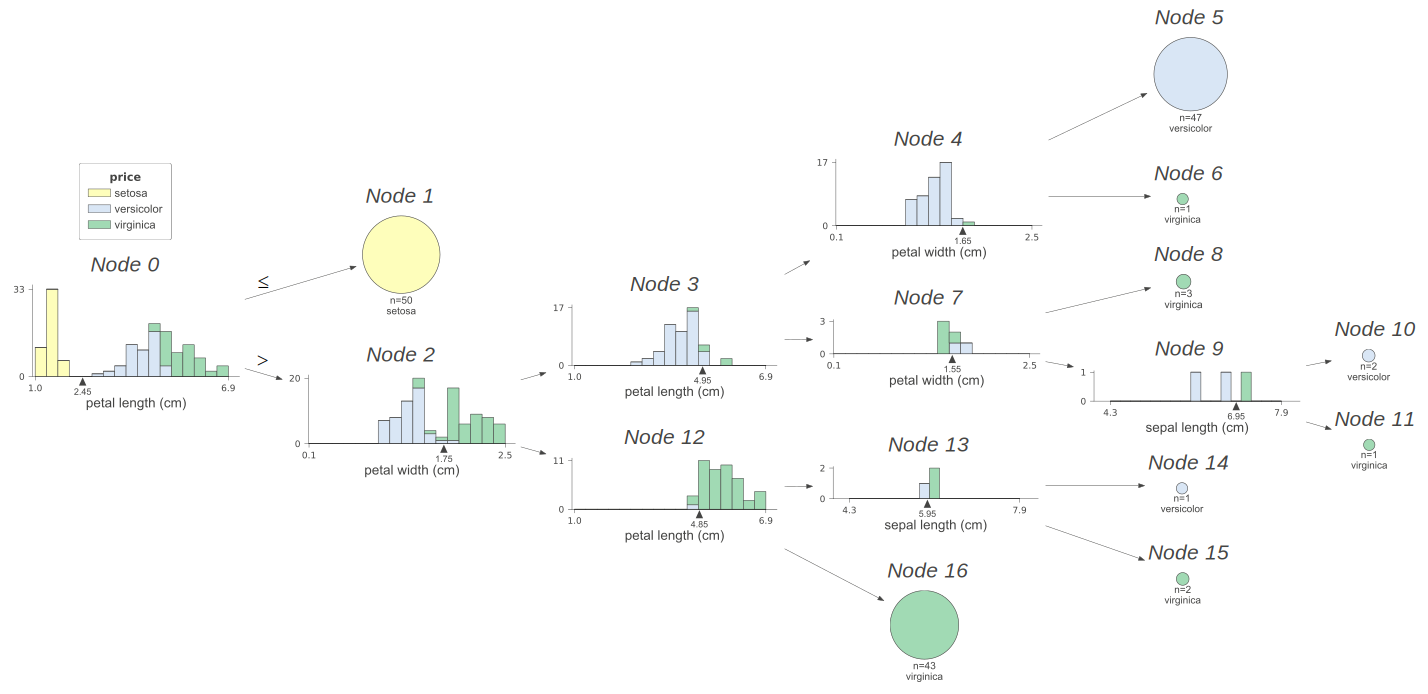

In [12]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               show_node_labels=True)
viz

## 6. Without Any graphs


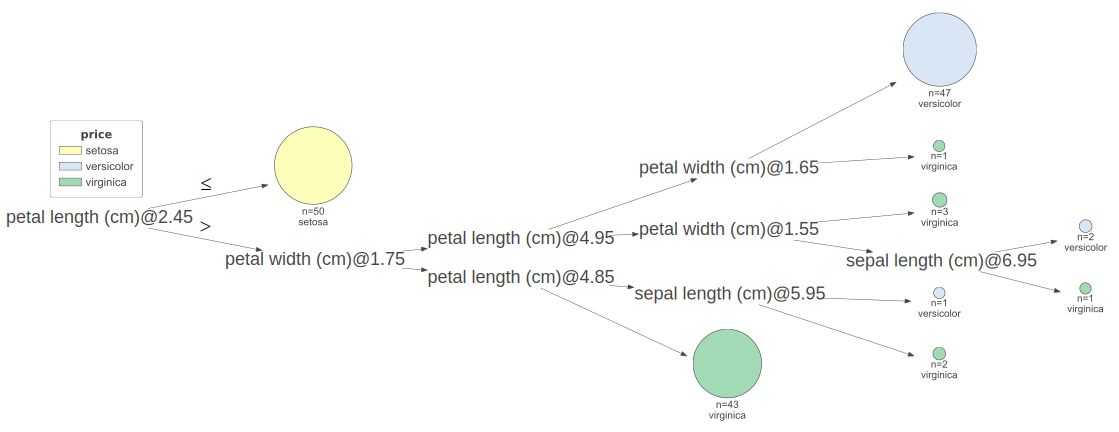

In [13]:
viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               histtype= 'barstacked',
               scale = 1.5,
               orientation='LR',
               fancy=False)
viz

## 7. Show just prediction path, nothing else


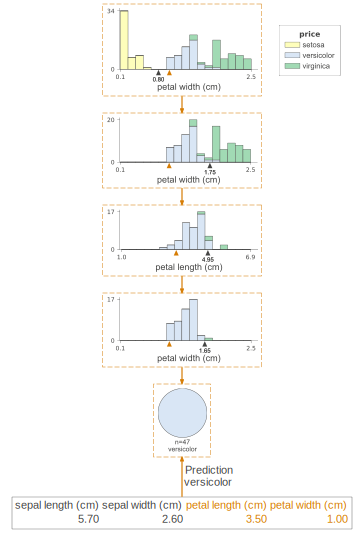

In [14]:
clas = tree.DecisionTreeClassifier()  
iris = load_iris()

X_train = iris.data
y_train = iris.target
clas.fit(X_train, y_train)

X = iris.data[np.random.randint(0, len(iris.data)),:]

viz = dtreeviz(clas, 
               X_train,
               y_train,
               target_name='price',
               feature_names=iris.feature_names, 
               class_names=["setosa", "versicolor", "virginica"], 
               X=X,
               show_just_path=True)
viz

## 8. Prediction Path in Plain english


In [15]:
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="plain_english"))

petal length (cm) < 4.95
0.8 <= petal width (cm)  < 1.65



## 9. Feature Importance


AxesSubplot(0.125,0.125;0.775x0.755)


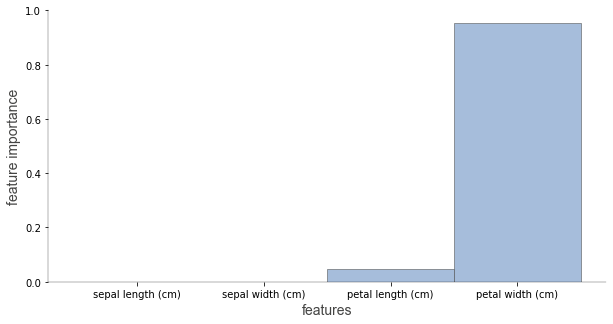

In [16]:
print(explain_prediction_path(clas, X, feature_names=iris.feature_names, explanation_type="sklearn_default"))

## 10. Univariate Regression


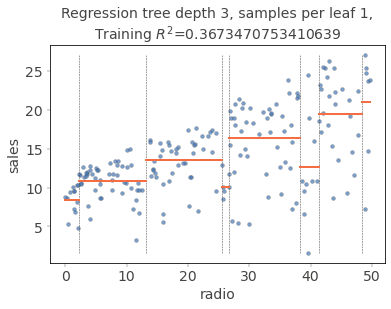

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *

df_cars = pd.read_csv("Advertising.csv")
X, y = df_cars[['radio']], df_cars['sales']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

fig = plt.figure()
ax = fig.gca()
rtreeviz_univar(dt, X, y, 'radio', 'sales', ax=ax)
plt.show()

## 11. 3-D Regression


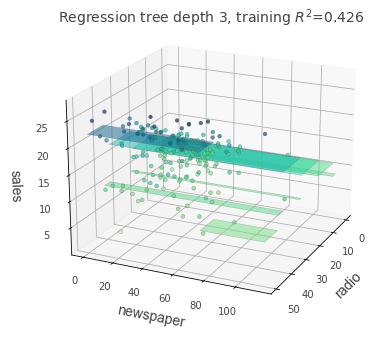

In [18]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *


X = df_cars[['radio','newspaper']]
y = df_cars['sales']

dt = DecisionTreeRegressor(max_depth=3, criterion="mae")
dt.fit(X, y)

figsize = (6,5)
fig = plt.figure(figsize=figsize)
ax = fig.add_subplot(111, projection='3d')

t = rtreeviz_bivar_3D(dt,
                      X, y,
                      feature_names=['radio', 'newspaper'],
                      target_name='sales',
                      fontsize=14,
                      elev=20,
                      azim=25,
                      dist=8.2,
                      show={'splits','title'},
                      ax=ax)
plt.show()